In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [2]:
data.reset_index(inplace=True)

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.532528,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.603836,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.373516,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.150156,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.465409,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.076508,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,90.976570,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.637413,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,88.931602,23020500


In [4]:
ma_100_days = data.Close.rolling(100).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

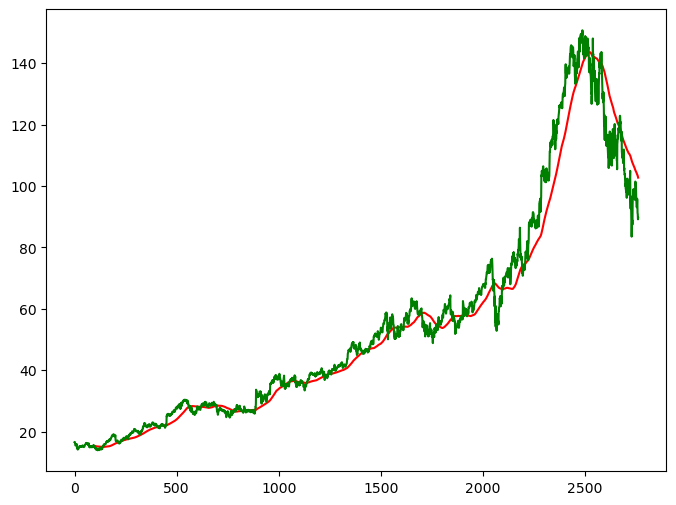

In [5]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show

In [6]:
ma_200_days = data.Close.rolling(200).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

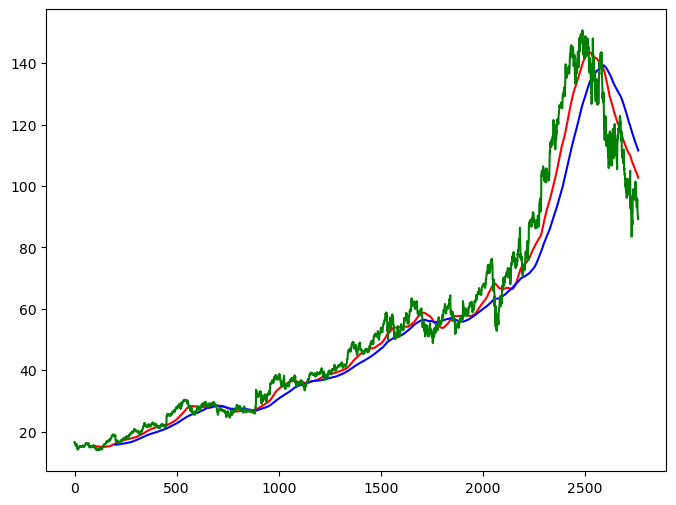

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show

In [8]:
data.dropna(inplace=True)

In [9]:
data_train =pd.DataFrame (data.Close[0: int(len(data)*0.80)])
data_test =pd.DataFrame (data.Close[int(len(data)*0.80):len(data)])

In [10]:
data_train.shape[0]

2208

In [11]:
data_test.shape[0]

553

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [24]:
data_train_scale = scaler.fit_transform(data_train)

In [25]:
x = []
y = []

for i in range  (100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [26]:
x, y = np.array(x), np.array(y)

In [27]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [28]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))



C:\Users\levin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [30]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 199ms/step - loss: 0.0757
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - loss: 0.0084
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 191ms/step - loss: 0.0054
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 190ms/step - loss: 0.0050
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - loss: 0.0056
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 189ms/step - loss: 0.0042
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - loss: 0.0044
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 190ms/step - loss: 0.0039
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - loss: 0.0038
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step - loss: 0.0036
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - loss: 0.0044
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 196ms/step - loss: 0.0041
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 180ms/step - loss: 0.0035
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - loss: 0.0034
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 

In [31]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [32]:
pas_100_days = data_train.tail(100)

In [33]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [34]:
data_test_scale = scaler.fit_transform(data_test)

In [35]:
x = []
y = []

for i in range  (100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y = np.array(x), np.array(y)


In [36]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [39]:
scale = 1/scaler.scale_

In [40]:
y_predict = y_predict*scale

In [41]:
y = y*scale

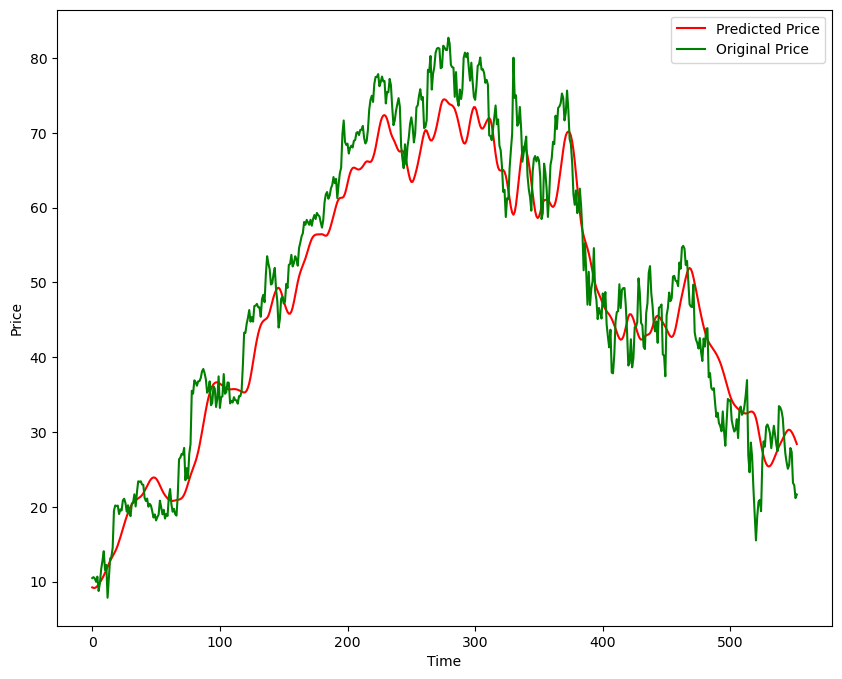

In [42]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [2]:

model.save('Stock Predictions model.keras')

NameError: name 'model' is not defined